In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()
plt.style.use("grayscale")

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_classes=2, n_features=100, n_informative=75, n_redundant=25, n_clusters_per_class=1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True, test_size=0.3)
print(X_train.shape, X_test.shape)

(700, 100) (300, 100)


In [4]:
from sklearn.linear_model import LogisticRegression

iterations = 500

log_model = LogisticRegression(max_iter=iterations)
log_model.fit(X_train, y_train)
log_model.score(X_test, y_test)

0.93

100%|██████████| 500/500 [00:05<00:00, 83.84it/s]


0.85

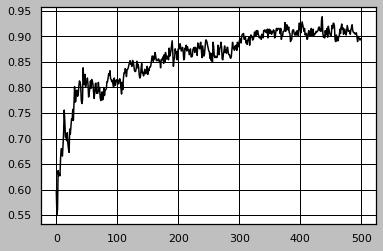

In [5]:
from algorithms import SimpleESClassifier
from objectives import CrossEntropyObjective

es_model = SimpleESClassifier(objective=CrossEntropyObjective(), n_iter=iterations, random_state=0)
es_model.fit(X_train, y_train)
plt.plot(range(iterations), es_model.history_)
es_model.score(X_test, y_test)

100%|██████████| 500/500 [00:09<00:00, 54.61it/s]


0.9066666666666666

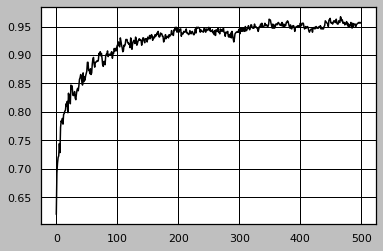

In [6]:
from algorithms import GeneticESClassifier

es_model = GeneticESClassifier(objective=CrossEntropyObjective(), n_iter=iterations, random_state=0)
es_model.fit(X_train, y_train)
plt.plot(range(iterations), es_model.history_)
es_model.score(X_test, y_test)

100%|██████████| 500/500 [00:06<00:00, 77.53it/s]


0.92

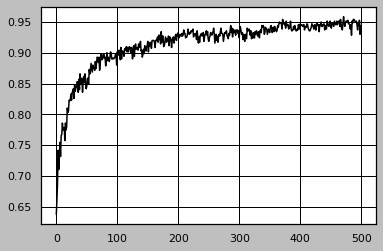

In [7]:
from algorithms import NaturalESClassifier

es_model = NaturalESClassifier(objective=CrossEntropyObjective(), n_iter=iterations, random_state=0)
es_model.fit(X_train, y_train)
plt.plot(range(iterations), es_model.history_)
es_model.score(X_test, y_test)

100%|██████████| 2500/2500 [00:09<00:00, 250.85it/s]


0.85

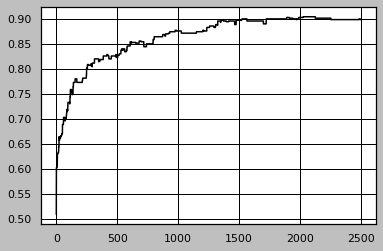

In [8]:
from algorithms import DifferentialEvolutionClassifier

iterations = 2500
bounds = np.array([(-15, 15)] * (1 + X_train.shape[1]))

de_model = DifferentialEvolutionClassifier(objective=CrossEntropyObjective(), n_iter=iterations, random_state=0, bounds=bounds)
de_model.fit(X_train, y_train)
plt.plot(range(iterations), de_model.history_)
de_model.score(X_test, y_test)